# Multi-Class Classification for Images

## Stephen Elston

## Introduction

The focus of this course is on deep learning algorithms. Deep learning methods are generally at their most powerful when dealing with unstructured data, such as speech, text or images. A canonical problem where deep learning is applied is the classification of complex unstructured data.  

To get our feet wet we will start with a simple example of **multi-class classification**. Multi-class classification problems occur in many applications of machine intelligence. Some examples include:
- The topic of each of the text documents in a corpus (collection of documents) can fall in one of multiple categories. In fact, a single document can be categorized into multiple topics. 
- The phonemes in a speech utterance can have many possible categories, indicating the word spoken. 
- The objects in an image can fall into many categories. 

In this lesson we will use simple image classification as an example of multi-class classification. To further simplify this example, we will use multi-class linear classifier models, rather than deep learning models. This lesson will also give you some experience with working with images, if you are not familiar with this type of data.  

## Multi-Class Loss Functions

To create a multi-class classifier we need a multi-class loss function. The classifier is trained to so that true categories maximum the loss function. 

In this section we will first review the familiar loss functions used for binary classification. We will then extend this theory to the multi-class categorical distribution.  

### Bernoulli and Binomial Distributions

We will start by reviewing the simple case of binary classification. In this case, the response variable is binary with states {0,1}. A **single realization** of such a variable has a **Bernoulli distribution**. The Bernoulli distribution is a **parametric distribution** which we can express as:

$$p(\nu = 1) = \Theta \\
where\\
\nu = an\ observation\\
\Theta = probability\ parameter$$

For a series of observations of a binary valued variable we use the **Binomial distribution**. We call each observation where $\nu = 1$ a **success**. The Binomial distribution of $k$ successes in $n$ trials is then expressed as:

$$p(\nu = k\ |\ \Theta) = \binom{n}{k} \Theta^k (1-\Theta)^{n-k}$$

where $\binom{n}{k}$ is read as "n choose k" is the **binomial coefficient**. The binomial coeficient is the number of ways to choose k items from n choices.

Given Binomially distributed cases what is an appropriate loss function classification? A good choice is the **logistic** or **sigmoid** function. The general sigmoid function can be written as:

$$\sigma(x) = \frac{L}{1 + e^{-k(x_0-x)}}\\
where\\
L = max\ value\\
k = slope\\
x_0 = sigmoid\ midpoint$$

With $L=1$, $k=1$, and $x_0 = 0$, the logistic function becomes: 

$$\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$$

The interprtation of the logistic function is fairly simple. Execute the code in the cell below to plot this function to aid in the explaination. 

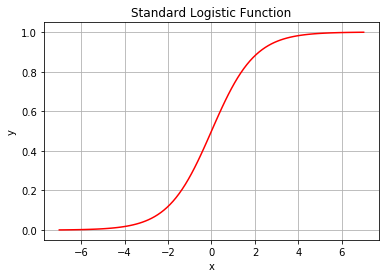

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plot the logistic transformation function (f(x) above)
x_seq = np.linspace(-7, 7, 100)

def logistic_function(x, center=0, scale=1):
    e = np.exp(-scale*(x-center))
    out = 1./(1. + e)
    return out

plt.plot(x_seq, logistic_function(x_seq), 'r')
plt.title('Standard Logistic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

As is evident from the plot and the definiton, the sigmoid function can asymptotically approach $0$ or $1$, but will never reach these extreem values. None the less, the sigmoid is a good approximation of a binary output. Typically, a threshold is set to determine if the outpus is 0 or 1. For example, a threshold of 0.5 gives equal probability weights to both responses. 

### Introduction to Categorical Distributions

With a review of binary classification behind us, let's move on to classification problems with multiple states or categories. In these problems the probabilities of the classes or categories are modeled with the **categorical distribution**. The categorical distribution is the multi-class generalization of the Bernoulli distribution. In fact, this distribution is sometime referred to as the **multinoulli distribution**. 

We can express the **probability mass** function of the categorical distribution, with $k$ categories, with probability $p_i$ for the ith category as follows.

$$p(x = i\ |\ \boldsymbol{\theta}) = \theta_i \\
where\\
\boldsymbol{\theta} = (\theta_1, \ldots, \theta_k),\\ and\\ \sum_{i=1}^k \theta_i = 1.0$$

The interpretation of the categorical distribution is straight forward. Each $\theta_i$ in the vector $\boldsymbol{\theta}$ is the probability that the category of the case is $i$. There is one probability $\theta_i$ for each category and the probability summed over all categories must be 1.0 as always. 

Now, we come to the question of finding a loss function for Categorically distributed classification problems. The natural choise is the **softmax** function or **normalized exponential function**. The softmax function is the multinomial generalization of the sigmoid or logistic function. The probability of each class $i$, of $K$ possible categories, is writen as: 

$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{k=1}^K e^{z_k}}$$

The normalization $\sum_{k=1}^K e^{z_k}$ ensures the sum of probabilities for all classes add to $1.0$. 

$\sigma(z_i)$ is the probability that the case falls in category $i$. The class selected by the classifier is the class with the largest value of $\sigma(z_i)$. 


### Primer on Tensors

In deep learning multi-dimensional arrays is often referred to as **tensors**. In general, a tensor is an array with one or more dimensions. A tensor can have zero or more dimensions. A scaler is a 0 dimensional tensor. A vector a one dimensional tensor. Examples of 0 and 1 dimensional tensors are shown in figure below along with 0-based indexing of the tensor elements.

<img src="img/Tensor-0-1.jpg" alt="Drawing" style="width:150px; height:220px"/>
<center>**0 and 1 dimensional tensors with indices**</center>

As another example, the figure in the cell below shows a 2-dimensional tensor. The 0-based indicies in the usual row-column order are also shown. 

<img src="img/Tensor2.jpg" alt="Drawing" style="width:250px; height:250px"/>
<center>**2 dimensional tensor with row-column indices**</center>

As you will see later in this lesson, a gray-scale image can be represented as a 2-dimensional tensor. 

An example of a three dimensional tensor is shown in the figure below. Adding a third dimension to the tensor, adds a third index for each element.     

<img src="img/Tensor3.jpg" alt="Drawing" style="width:300px; height:300px"/>
<center>**3 dimensional tensor with indices**</center>

The 3-dimensional tensor can represent a color image. The third dimension are referred to as the **color channels**, red, green and blue, as shown in the figure. 

As has already been mentioned, tensors can have any number of dimensions. This means that the tensor formalism is quite powerful and flexible for deep learning problems. Further, the usual rules of linear algebra for addition, subtraction and multiplication apply. 

## Loading image data

As a first step in classifying the images, the data set must be loaded. The data set is comprised of 70,000 hand-written labeled digits collected by the US National Institute of Standards and Technology and known as MNIST. There are 60,000 training cases and 10,000 evaluation cases in the data set. 

Execute the code in the cell below to load the packages you will need for the rest of this lesson.  

In [5]:
import numpy.random as nr
from keras.datasets import mnist
import keras.utils.np_utils as ku
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


The image data set is included in the deep learning Keras package. The code in the cell below uses a Keras utility to load the image and labels for the training and test cases. Execute this code to load these data.   

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Exploring the image data

With the image data loaded we can now explore it. As a first step, execute the code in the cell below to examine the dimensionality and data types of the image data.

In [3]:
print(train_images.shape)
print(test_images.shape)
print(train_images.dtype)

(60000, 28, 28)
(10000, 28, 28)
uint8


Examine the dimensions of the image data. The tensors has 3 dimensions. The dimensions of the image tensors are:
1. The number of images in the tensor.
2. The first dimension of the image, which is 28.
3. The second dimension of the image, also 28.

Three points to note about the nature of image data:
1. The MNIST data is a gray scale image. Notice that the data type is an 8 bit unsigned integer. The 784 (= 28 * 28) pixels have gray values in the range 0-255. A pixel value of 0 is black and a 255 value is saturated white, with values in between being gray scale. 
2. If these were color images there would be a fourth dimension to the tensor. There would be three levels of color for the red, green and blue color channels. 
3. In this case, the first dimension of the tensor indexes the images. If this was video data the first dimension would be the frame number.  

With the data loaded, let's have a look at one of these images. A single image is a slice out of the tensor. Execute the code in the cell below to display the 150th image (this choice is arbitrary) in gray scale.

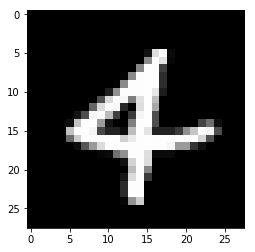

In [4]:
plt.imshow(train_images[150,:,:], cmap = 'gray')

The 28x28 array of pixels for the single image is displayed. The displayed 150th image is clearly of a handwritten number 4. 

Next, execute the code in the cell below to plot a histogram of the pixel values of the images.

(array([38215848.,   180942.,   162067.,   147901.,   141101.,   133792.,
          112073.,   111735.,   110751.,   103529.,   118595.,   100652.,
          124032.,    86690.,    84188.,    81588.,   115047.,    76640.,
           86551.,    78203.,   102560.,    86284.,    93855.,    82644.,
           81301.,   147217.,    80675.,    99574.,    85732.,    90016.,
          102408.,    87486.,    85176.,   110181.,    84356.,    88564.,
           86185.,   129871.,   110928.,   103175.,   118426.,   118588.,
          112234.,   121583.,   141029.,   156594.,   144749.,   174441.,
          181942.,  3460301.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6,

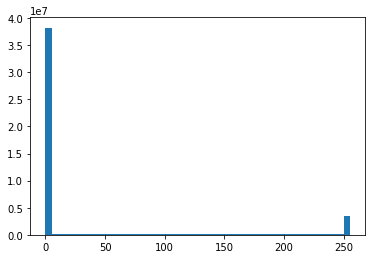

In [5]:
plt.hist(train_images.flatten(), bins = 50) 

You can see that most pixels have a value of 0, or black. A number of pixels have a value of 255, or saturated white. There are some pixel values in between these extreme. 

To perform machine learning on image data we need the pixel values to be floating point numbers. Further, we want to ensure that the pixel values are normalized in a range 0-1. Examine and then execute the code in the cell below to transform the pixel values to normalized floating point.    

In [6]:
train_images = np.divide(train_images.astype('float'), [255.0])
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
float64


The pixel values in these images are now floating point numbers. 

Next, we can investigate the range of pixel normalized pixel values. Execute the code in the cell below and examine the histogram.

(array([       0.,        0.,        0.,        0., 38215848.,   216962.,
          182713.,   176391.,   166824.,   134986.,   138758.,   125291.,
          138982.,   124098.,   142165.,   104003.,    97979.,   114198.,
          110097.,   104427.,   114778.,   102192.,   109901.,   100283.,
           97693.,   162247.,   102469.,   115866.,   104811.,   120229.,
          102921.,   125156.,   105460.,   102219.,   106192.,   148832.,
          128942.,   146881.,   130609.,   137958.,   148868.,   170066.,
          190633.,   191630.,   219141.,  3460301.,        0.,        0.,
               0.,        0.]),
 array([-0.1  , -0.076, -0.052, -0.028, -0.004,  0.02 ,  0.044,  0.068,
         0.092,  0.116,  0.14 ,  0.164,  0.188,  0.212,  0.236,  0.26 ,
         0.284,  0.308,  0.332,  0.356,  0.38 ,  0.404,  0.428,  0.452,
         0.476,  0.5  ,  0.524,  0.548,  0.572,  0.596,  0.62 ,  0.644,
         0.668,  0.692,  0.716,  0.74 ,  0.764,  0.788,  0.812,  0.836,
         0.86 , 

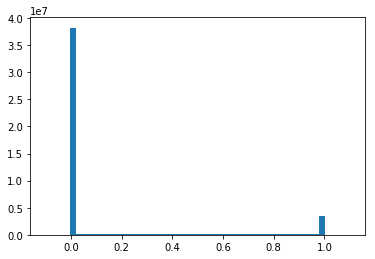

In [7]:
plt.hist(train_images.flatten(), bins = 50, range = (-0.1,1.1))

The histogram for the normalized pixel values resembles the original pixel values, except with a range of 0 to 1.  

The MNIST images have labels. It is interesting to examine a sample of the labels and the corresponding images. The function in the cell below displays an array of labels and associated images for 16 randomly selected images. Execute this code and examine the result.  

[[7 3 2 7]
 [1 7 7 8]
 [8 4 1 2]
 [1 5 0 8]]


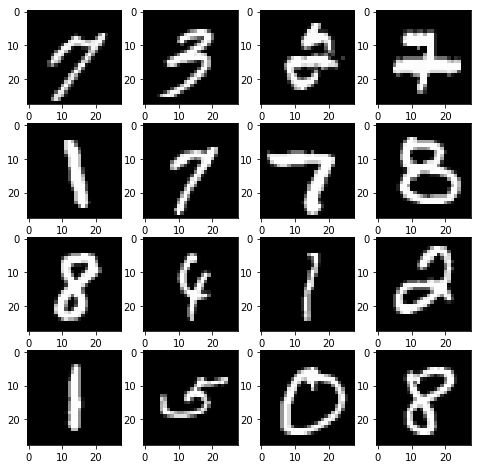

In [8]:
def plot_samples(images, labels, n_vert = 4, n_horr = 4):
    %matplotlib inline
    img_len = images.shape[0]
#    images = images[:,:,:,0]
    size = n_vert * n_horr 
    select_imgs = nr.choice(range(images.shape[0]), size = size)
    imgs = images[select_imgs,:,:]
    fig=plt.figure(figsize=(8, 8))
    print(labels[select_imgs].reshape((n_vert,n_horr)))
    for i in range(1, size+1):
        img = imgs[i-1,:,:]
        fig.add_subplot(n_vert, n_horr, i)
        plt.imshow(img, cmap = 'gray')
    plt.show()
 
nr.seed(456)
plot_samples(train_images, train_labels)  

You can see that the labels match the hand written figures. However, some of the hand written figures are not well formed.  

## Logistic regression model

Now you will use multi-class logistic regression to classify the hand written digit images. The model assumes the probabilities of each digit in 0-9 appearing in the image follows a categorical distribution.  

> **Note:** The call to the `LogisticRegression` object constructor specifies the distribution class as `multinomial`. However, in reality this is a categorical distribution. 

We will use the logistic regression model from the Python Scikit-Learn module. The pixels of the images are the features for the model. To use a Scikkit-Learn model the features must be arranged in a rectangular array with the features in the columns and cases in rows. This requires that each image be flattened into a vector. An example of flattening a 2-dimensional tensor is shown in the figure below. From the indicies in the figure you can see that flattening a tensor involves concatenating the columns of the tensor. 

<img src="img/TensorFlatten.jpg" alt="Drawing" style="width:300px; height:300px"/>
<center>**Example of flattening a tensor**</center>

Execute the code in the cell below to flatten the image data. 

In [9]:
train_images_flatten = train_images.reshape(train_images.shape[0],train_images.shape[1] * train_images.shape[2])
print(train_images_flatten.shape)

(60000, 784)


The feature array now contains 60,000 cases with 784 (= 28 x 28) features each. 

The code in the cell below defines the logistic regression model object and fits the model to the training data. The arguments for the call to the `LogisticRegression` constructor are:
- `multi_class` defines the probability distribution used for the categories being classified,
- `solver` defines the optimization algorithm used, a topic we will address in other lessons,
- `max_iter` is the number of iterations allowed until the solver converges, and
- `fit_intercept` determines if a bias term is used in the regression solution, which is False in this case, since no bias is required in this type of classification problem. 

Execute this code. 

In [15]:
logistic_mod = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 500, fit_intercept = False)
logistic_mod.fit(train_images_flatten, train_labels)

C:\Users\StevePC2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

With the logistic regression model fit, you will now test the model. 

The test features must be flattened, just as was done for the training features. Execute the code in the cell below to flatten the test features.    

In [16]:
print(test_images.shape)
test_images_flatten = test_images.reshape(test_images.shape[0], test_images.shape[1] * test_images.shape[2])
print(test_images_flatten.shape)

(10000, 28, 28)
(10000, 784)


Now execute the code in the cell below to predict the class of the images in the test data set. 

In [17]:
lables_predicted = logistic_mod.predict(test_images_flatten)

Let's have a first look at these predictions. Execute the code in the cell below to display classification results and images for the test cases.

[[2 8 5 2]
 [9 3 3 2]
 [6 9 0 8]
 [0 4 9 0]]


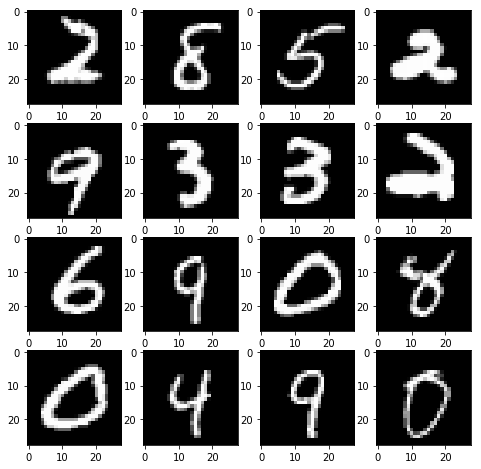

In [22]:
nr.seed(781)
plot_samples(test_images, lables_predicted) 

These results look good. All of these digits appear to be correctly classified. 

Finally, we will now compute the accuracy of the classification. Accuracy is simply the number of correctly classified test cases divided by the total number of test cases. Execute the code in the cell below to display the accuracy of the classification. 

In [19]:
correct_classification = [1 if x == y else 0 for x,y in zip(test_labels, lables_predicted)]
sum(correct_classification)/len(correct_classification)

0.9263

The overall accuracy is about 93%, which seem good given the simple model used. 

### Copyright 2019, Stephen F Elston. All rights reserved. 